In [13]:
import pandas as pd
import numpy as np
import os
import csv

import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
datestring = [201501, 201502, 201503, 201504, 201505, 201506, 201507, 201508, 201509, 201510, 201511, 201512]
i = 0
dfs = []
for elem in datestring:
    name = 'citi' + str(datestring[i])
    name = pd.read_csv("../data/external/ridership/"+ str(datestring[i]) + "-citibike-tripdata.csv")
    name = pd.DataFrame(name['starttime'].groupby(name['start station id']).count())
    tripcount = 'count of rides ' + str(datestring[i])
    name = name.rename(columns={'starttime': tripcount})
    dfs.append(name)
    i+=1

In [15]:
total = dfs[0].join((dfs[1], dfs[2], dfs[3], dfs[4], dfs[5], dfs[6], dfs[7], dfs[8], dfs[9], dfs[10], dfs[11]), how='outer')
total = total.reset_index()
total = total.rename(columns={'start station id': 'Station_id'})
total['average station ridership 2015'] = total.mean(axis=1)

In [16]:
total

,Station_id,count of rides 201501,count of rides 201502,count of rides 201503,count of rides 201504,count of rides 201505,count of rides 201506,count of rides 201507,count of rides 201508,count of rides 201509,count of rides 201510,count of rides 201511,count of rides 201512,average station ridership 2015
0,72,638.0,480.0,1026.0,1948.0,2943.0,2767.0,3149.0,3504.0,3667.0,3546.0,2323.0,1648.0,2131.615385
1,79,566.0,335.0,725.0,1728.0,2368.0,2424.0,2626.0,2726.0,3011.0,2646.0,2074.0,1579.0,1760.538462
2,82,310.0,276.0,406.0,788.0,1068.0,946.0,1193.0,1145.0,1166.0,1053.0,819.0,713.0,766.538462
3,83,258.0,162.0,281.0,749.0,1101.0,994.0,1659.0,1724.0,1505.0,1104.0,886.0,717.0,863.307692
4,116,1696.0,1193.0,2105.0,1933.0,2281.0,4800.0,5674.0,6175.0,6558.0,5825.0,4455.0,3686.0,3576.692308
5,119,118.0,68.0,84.0,130.0,158.0,107.0,177.0,249.0,225.0,197.0,195.0,150.0,152.076923
6,120,107.0,73.0,171.0,355.0,478.0,507.0,581.0,621.0,582.0,533.0,486.0,414.0,386.769231
7,127,1359.0,910.0,1584.0,3657.0,7534.0,7306.0,6933.0,6790.0,7183.0,6491.0,5030.0,3942.0,4526.615385
8,128,1433.0,973.0,1695.0,3573.0,6127.0,5830.0,6192.0,6606.0,5116.0,NaN,2806.0,3117.0,3633.000000
9,137,626.0,448.0,829.0,1425.0,2062.0,1828.0,2219.0,2800.0,2746.0,2799.0,1931.0,1699.0,1657.615385


In [17]:
total.loc[total['average station ridership 2015'].idxmax()]

Station_id                          519.000000
count of rides 201501              2354.000000
count of rides 201502              1549.000000
count of rides 201503              3186.000000
count of rides 201504              5801.000000
count of rides 201505             10388.000000
count of rides 201506             11052.000000
count of rides 201507             12359.000000
count of rides 201508             12611.000000
count of rides 201509             14063.000000
count of rides 201510             11340.000000
count of rides 201511             11267.000000
count of rides 201512              8843.000000
average station ridership 2015     8102.461538
Name: 294, dtype: float64

In [18]:
total.describe()

/Users/fatkay22/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Station_id,count of rides 201501,count of rides 201502,count of rides 201503,count of rides 201504,count of rides 201505,count of rides 201506,count of rides 201507,count of rides 201508,count of rides 201509,count of rides 201510,count of rides 201511,count of rides 201512,average station ridership 2015
count,488.000000,330.000000,328.000000,328.000000,327.000000,327.000000,326.000000,330.000000,419.000000,453.000000,463.000000,467.000000,471.000000,488.000000
mean,1297.534836,865.309091,600.396341,1042.152439,1995.076453,2941.853211,2887.174847,3289.927273,2813.947494,2847.017660,2618.308855,2114.014989,1707.271762,1967.072675
std,1287.346458,613.234621,436.350743,743.447948,1299.150722,2027.399137,1984.712722,2226.414911,2476.813554,2315.158013,2056.005724,1669.737333,1366.441352,1298.962491
min,72.000000,42.000000,21.000000,3.000000,6.000000,6.000000,2.000000,35.000000,3.000000,8.000000,3.000000,20.000000,1.000000,67.500000
25%,333.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,896.269231
50%,467.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1705.076923
75%,3073.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2727.407692
max,3242.000000,4157.000000,2238.000000,5916.000000,6945.000000,12988.000000,13347.000000,14493.000000,14498.000000,14923.000000,11340.000000,11267.000000,8843.000000,8102.461538


In [19]:
total2 = total.dropna()

In [20]:
print(len(total2))

309


In [21]:
total2

,Station_id,count of rides 201501,count of rides 201502,count of rides 201503,count of rides 201504,count of rides 201505,count of rides 201506,count of rides 201507,count of rides 201508,count of rides 201509,count of rides 201510,count of rides 201511,count of rides 201512,average station ridership 2015
0,72,638.0,480.0,1026.0,1948.0,2943.0,2767.0,3149.0,3504.0,3667.0,3546.0,2323.0,1648.0,2131.615385
1,79,566.0,335.0,725.0,1728.0,2368.0,2424.0,2626.0,2726.0,3011.0,2646.0,2074.0,1579.0,1760.538462
2,82,310.0,276.0,406.0,788.0,1068.0,946.0,1193.0,1145.0,1166.0,1053.0,819.0,713.0,766.538462
3,83,258.0,162.0,281.0,749.0,1101.0,994.0,1659.0,1724.0,1505.0,1104.0,886.0,717.0,863.307692
4,116,1696.0,1193.0,2105.0,1933.0,2281.0,4800.0,5674.0,6175.0,6558.0,5825.0,4455.0,3686.0,3576.692308
5,119,118.0,68.0,84.0,130.0,158.0,107.0,177.0,249.0,225.0,197.0,195.0,150.0,152.076923
6,120,107.0,73.0,171.0,355.0,478.0,507.0,581.0,621.0,582.0,533.0,486.0,414.0,386.769231
7,127,1359.0,910.0,1584.0,3657.0,7534.0,7306.0,6933.0,6790.0,7183.0,6491.0,5030.0,3942.0,4526.615385
9,137,626.0,448.0,829.0,1425.0,2062.0,1828.0,2219.0,2800.0,2746.0,2799.0,1931.0,1699.0,1657.615385
10,143,299.0,170.0,314.0,778.0,1198.0,1021.0,1224.0,1245.0,1302.0,1009.0,824.0,732.0,789.153846


In [10]:
# Save to CSV
total2.to_csv('../data/processed/ridership.csv')

In [36]:
len(total2)

309

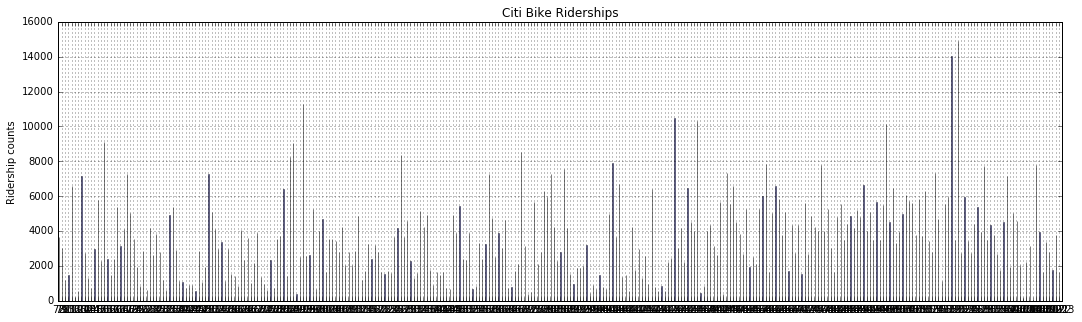

In [35]:
# Setting the positions and width for the bars
pos = list(range(len(total2.Station_id)))  #  len(total2.Station_id)
width = 0.05

# Plotting the bars
fig, ax = plt.subplots(figsize=(18,5))

# Create a bar with March data,
# in position pos,
'''
plt.bar(pos,
        #using the month ridership data,
        total2['count of rides 201503'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#EE3224',
        # with label the first value in first_name
        label=total2['Station_id'][0])


# Create a bar with a month data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos],
        #using df['mid_score'] data,
        total2['count of rides 201506'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='#F78F1E',
        # with label the second value in first_name
        label=total2['Station_id'][1])
'''

# Create a bar with September data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos],
        #using total2 month data,
        total2['count of rides 201509'],
        # of width
        width,
        # with alpha 0.5
        alpha=0.5,
        # with color
        color='blue',
        # with label the third value in first_name
        label=total2['Station_id'][2])

# Set the y axis label
ax.set_ylabel('Ridership counts')

# Set the chart's title
ax.set_title('Citi Bike Riderships')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(total2['Station_id'])

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
#plt.ylim([0, max(total2[''] + total2[''] + total2[''])] )

# Adding the legend and showing the plot
#plt.legend(['', '', ''], loc='upper left')
plt.grid()
plt.show()